# Niklas Tecklenburg (88481171)

## Research question/interests
After conducting the Exploaratory Data analysis, I came to the conclusion, that it might be difficult to identify proper coupling parameters for the Team and their drivers. On the other hand the analysis raised my curiosity, looking into individual races. Here I would like to come up with an analysis / analysis criteria, to evaluate which races in the past have been the most interesting one for spectators.

### Import Packages for the EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
circuits = pd.read_csv('../data/raw/circuits.csv', na_values=['\\N'])
constructor_res = pd.read_csv('../data/raw/constructor_results.csv', na_values=['\\N'])
constructor_stand = pd.read_csv('../data/raw/constructor_standings.csv', na_values=['\\N'])
constructors = pd.read_csv('../data/raw/constructors.csv', na_values=['\\N'])
driver_stand = pd.read_csv('../data/raw/driver_standings.csv', na_values=['\\N'])
drivers = pd.read_csv('../data/raw/drivers.csv', na_values=['\\N'])
lap_times = pd.read_csv('../data/raw/lap_times.csv', na_values=['\\N'])
pit_stops = pd.read_csv('../data/raw/pit_stops.csv', na_values=['\\N'])
qualifying = pd.read_csv('../data/raw/qualifying.csv', na_values=['\\N'])
races = pd.read_csv('../data/raw/races.csv', na_values=['\\N'])
results = pd.read_csv('../data/raw/results.csv', na_values=['\\N'])
seasons = pd.read_csv('../data/raw/seasons.csv', na_values=['\\N'])
status = pd.read_csv('../data/raw/status.csv', na_values=['\\N'])

## Exploratory Data Analysis
As the Formula 1, the Rules and the Cars have changed over time, I am focusing on the development over time in my EDA. The EDA includes the following Analysis:
- Number of Seasons in the Dataset
- Races per Season
- Number of Drivers Winning a race per Season
- Development of Pit Stop Times over time
- Average number of Stops per Race per Season
- Number of Collisions (Driver could not finish race) per Year
- Average Number of Lappings in a Race per Season
- How did the max speed evolved

### Number of Seasons in the Dataset

In [3]:
len(seasons)

72

Our Dataset contains data for 72 Seasons. One has to notice, that results of the current season are also included, but this season is not yet over.

### Races per Seson

In [4]:
races_per_season = races.groupby('year').count().reset_index()[['year', 'raceId']].rename(columns={'raceId':'Number of Races'})

Text(0.5, 1.0, 'Races per Season')

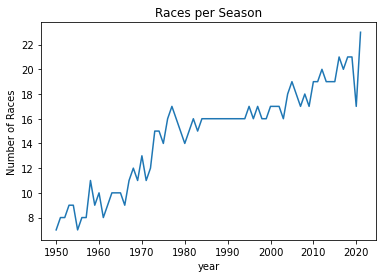

In [5]:
sns.lineplot(x=races_per_season['year'],y=races_per_season['Number of Races']).set_title("Races per Season")

### Number of Drivers Winning a race per Season
As I have noticed that the number of drivers participating in Races/Seasons, the number of Drivers needs to be considered here as well.

In [6]:
race_years = races[['raceId', 'year']]
df_results = results.merge(race_years, on='raceId', how='left')
df_results_driver_count = df_results.groupby('year').nunique().reset_index()
df_results_driver_count = df_results_driver_count[['driverId','year']]
df_results_driver_count = df_results_driver_count.rename(columns={'driverId': '#ofDrivers'})
race_winners = df_results[df_results['positionOrder'] == 1]
race_winners = race_winners.groupby(['year']).nunique().reset_index()
race_winners = race_winners[['driverId','year']]
race_winners = race_winners.rename(columns={'driverId':'#ofWinners'})
race_winners = race_winners.merge(df_results_driver_count, on='year', how='left')
race_winners = race_winners[['year', '#ofWinners', '#ofDrivers']]
race_winners['relative_num_winners'] = race_winners['#ofWinners'] / race_winners['#ofDrivers']
race_winners

,year,#ofWinners,#ofDrivers,relative_num_winners
0,1950,3,81,0.037037
1,1951,6,84,0.071429
2,1952,3,105,0.028571
3,1953,5,108,0.046296
4,1954,4,97,0.041237
...,...,...,...,...
67,2017,5,25,0.200000
68,2018,5,20,0.250000
69,2019,5,20,0.250000
70,2020,5,23,0.217391


Text(0.5, 1.0, 'Number of Drivers over Time')

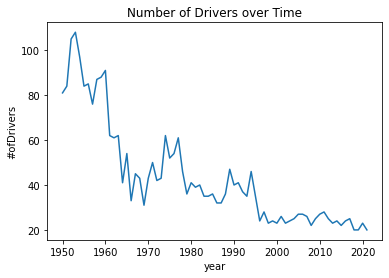

In [7]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers']).set_title("Number of Drivers over Time")

We can see that the number of drivers participating in a see has decreased from over 100 in the 50s to just above 20 from mid 90s to today. Looking into the rules there are 10 teams, with 2 drivers each. the peaks result from drivers missing a race and a replacment driver, taking the seat for this race.

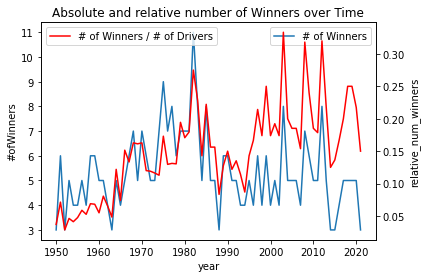

In [8]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofWinners'])
plt.legend(labels=['# of Winners'])
ax2 = plt.twinx()
sns.lineplot(x=race_winners['year'],y=race_winners['relative_num_winners'], ax=ax2, color="r").set_title("Absolute and relative number of Winners over Time")
plt.legend(labels=['# of Winners / # of Drivers'])

We can see, that there seems to be a slight upwards trend in the relative amount of different drivers, wining a race in a season.

### Development of Pit Stop Times over time

In [9]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421


In [10]:
# Average duration
df_pit_stops = pit_stops.merge(race_years, on='raceId', how='left')
df_pit_stops_duration = df_pit_stops.groupby(['year']).mean().reset_index()
df_pit_stops_duration['Avg Duration in Seconds'] = df_pit_stops_duration['milliseconds'] / 1000 
df_pit_stops_duration

,year,raceId,driverId,stop,lap,milliseconds,Avg Duration in Seconds
0,2011,849.680431,219.649910,1.947038,27.572711,24448.849192,24.448849
1,2012,868.778013,326.889006,1.739958,25.416490,23283.769556,23.283770
2,2013,888.593060,461.409043,1.855941,25.309148,24121.318612,24.121319
3,2014,909.029412,456.474265,1.754902,24.678922,55088.632353,55.088632
4,2015,935.900135,505.113360,1.801619,27.109312,25500.213225,25.500213
5,2016,957.864510,544.389282,1.823054,22.561173,124357.194135,124.357194
6,2017,978.353026,586.048991,1.914986,19.799712,56789.619597,56.789620
7,2018,998.692164,636.968284,1.332090,25.369403,24674.283582,24.674284
8,2019,1020.086287,618.389831,1.520801,26.211094,24870.613251,24.870613
9,2020,1039.163300,674.471380,1.712121,26.984848,160940.321549,160.940322


Text(0.5, 1.0, 'Average Pit Stop Duration over Time')

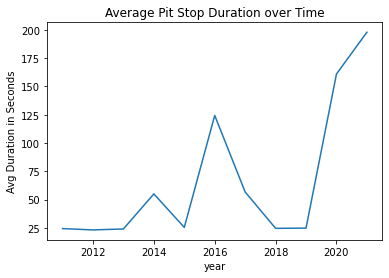

In [11]:
sns.lineplot(x=df_pit_stops_duration['year'], y=df_pit_stops_duration['Avg Duration in Seconds']).set_title("Average Pit Stop Duration over Time")

We see here some really high peaks, which are hard to explain, especially as we are talking about the average. When looking into the data behind we see, that there is an issue with the formating, that is not the same for every record. This causes the problem and we will take care of this in the Data Pipeline.

### Average number of Stops per Race per Season

In [12]:
# Aveage number of stops
df_pit_stops_number = df_pit_stops.groupby(['raceId','driverId']).max().reset_index()
df_pit_stops_number = df_pit_stops_number.groupby(['year']).mean().reset_index()
df_pit_stops_number['avg_stops_per_race'] = df_pit_stops_number['stop']
df_pit_stops_number

,year,raceId,driverId,stop,lap,milliseconds,avg_stops_per_race
0,2011,849.979021,225.608392,2.596737,39.477855,27492.722611,2.596737
1,2012,869.442953,329.574944,2.116331,34.908277,24396.982103,2.116331
2,2013,889.513716,457.650873,2.371571,36.301746,26190.623441,2.371571
3,2014,908.917989,458.838624,2.161376,34.505291,90976.293651,2.161376
4,2015,935.703170,499.657061,2.135447,35.386167,27515.438040,2.135447
5,2016,958.048724,543.958237,2.294664,31.821346,193524.948956,2.294664
6,2017,978.605042,585.392157,1.943978,29.680672,88961.081232,1.943978
7,2018,999.057592,627.853403,1.403141,29.272251,25313.510471,1.403141
8,2019,1019.960880,631.921760,1.591687,30.449878,25811.205379,1.591687
9,2020,1039.102236,678.246006,1.897764,33.878594,235613.910543,1.897764


Text(0.5, 1.0, 'Average number of Stops per Race per Season')

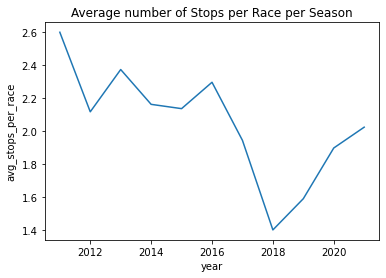

In [13]:
sns.lineplot(x=df_pit_stops_number['year'], y=df_pit_stops_number['avg_stops_per_race']).set_title('Average number of Stops per Race per Season')

### Number of Collisions (Driver could not finish race) per Year

In [14]:
df_results = df_results.merge(status, on="statusId", how='left')

In [15]:
df_results_col = df_results[(df_results['status']=='Collision') | (df_results['status']=='Collision damage')]
df_results_col = df_results_col.groupby(['year']).count().reset_index()

Text(0, 0.5, 'Number of Collisions')

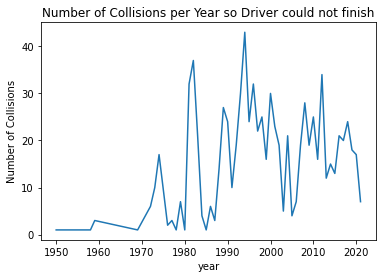

In [16]:
sns.lineplot(x=df_results_col['year'], y=df_results_col['status']).set_title('Number of Collisions per Year so Driver could not finish')
plt.ylabel('Number of Collisions')

Based on this plot it looks like the numbe of collisions increased over time. But taken the number of races per season into account this get relativised.

### Average Number of Lappings in a Race per Season

In [17]:
df_results_lap = df_results[df_results['status'].str.startswith('+')]
df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)
df_lapings_seas = df_results_lap.groupby('raceId').sum().reset_index()[['raceId', 'Laps behind']].rename({'Laps behind':'Avg Laps behind'})
df_results_lap = df_results_lap[['year', 'raceId']].merge(df_lapings_seas, on='raceId', how='left')
df_results_lap = df_results_lap.drop_duplicates()
df_results_lap = df_results_lap.groupby('year').mean().reset_index()

/var/folders/86/jj_j7bm56glckk9r2cy1875h0000gn/T/ipykernel_34257/2894694879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)


Text(0, 0.5, '')

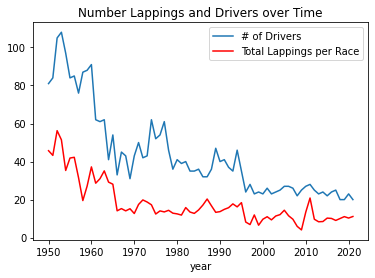

In [18]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers'])
sns.lineplot(x=df_results_lap['year'],y=df_results_lap['Laps behind'], color="r").set_title('Number Lappings and Drivers over Time')
plt.legend(labels=['# of Drivers', 'Total Lappings per Race'])
plt.ylabel('')

### How did the max speed evolved

In [19]:
df_results_speed = df_results.groupby('year').mean().reset_index()

Text(0.5, 1.0, 'Average Season-Race Top Speed over Time')

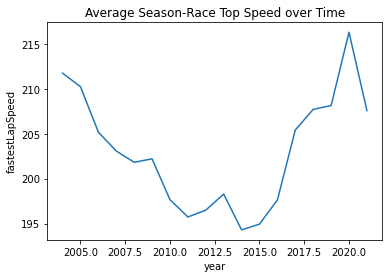

In [20]:
sns.lineplot(x=df_results_speed['year'], y=df_results_speed['fastestLapSpeed']).set_title('Average Season-Race Top Speed over Time')

## Data Analysis Pipeline
As I am planning to conduct analysis on how exciting a race has been, my Pipeline will focus on enriching the race table with new data from the other tables. I am going to collect data in order to include these characteristics:
- How many Overtakes occured in the race
- Was the race close at the top (time difference between 1st and 2nd and average time difference between first 10 drivers)
- Highest speed of the race
- Was this race faster then the previous races on this track (fastest lap compared to track record till date)
- Does the race have a tradition (how many races have been taken place here)
- Is the driver championship exciting?
- Is the constructors championship exciting?
- Average pitstop time

Besides these criteria, I am planning to include the following information to provide the reader with extra information:
- Date of the Race
- Location
- Race Winner + 2nd and 3rd
- Constructors Winner
- Leader of Drivers Championship at this point
- Leader of Constructors Championship at this point
- Pole Position


### Import Packages for Data Analysis Pipeline

In [17]:
import numpy as np
import pandas as pd

### 1. Load Data

In [18]:
circuits = pd.read_csv('../data/raw/circuits.csv')
constructor_res = pd.read_csv('../data/raw/constructor_results.csv')
constructor_stand = pd.read_csv('../data/raw/constructor_standings.csv')
constructors = pd.read_csv('../data/raw/constructors.csv')
driver_stand = pd.read_csv('../data/raw/driver_standings.csv')
drivers = pd.read_csv('../data/raw/drivers.csv')
lap_times = pd.read_csv('../data/raw/lap_times.csv')
pit_stops = pd.read_csv('../data/raw/pit_stops.csv')
qualifying = pd.read_csv('../data/raw/qualifying.csv')
races = pd.read_csv('../data/raw/races.csv')
results = pd.read_csv('../data/raw/results.csv')
seasons = pd.read_csv('../data/raw/seasons.csv')
status = pd.read_csv('../data/raw/status.csv')

### 2. Clean Data
Replace the not available data which are marked wit \N in the csv files with np.nan to deal with missing values properly

In [19]:
circuits = circuits.replace('\\N',np.nan)
constructor_res = constructor_res.replace('\\N',np.nan)
constructor_stand = constructor_stand.replace('\\N',np.nan)
constructors = constructors.replace('\\N',np.nan)
driver_stand = driver_stand.replace('\\N',np.nan)
drivers = drivers.replace('\\N',np.nan)
lap_times = lap_times.replace('\\N',np.nan)
pit_stops = pit_stops.replace('\\N',np.nan)
qualifying = qualifying.replace('\\N',np.nan)
races = races.replace('\\N',np.nan)
results = results.replace('\\N',np.nan)
seasons = seasons.replace('\\N',np.nan)
status = status.replace('\\N',np.nan)

# Take care of the pitstop time issue we identified in the EDA
pit_stops['duration'] = pit_stops['duration'].apply(lambda x: float(x.split(':')[1]) if ':' in x else float(x))

# Adjust datatype for fastest speed
results['fastestLapSpeed'] = results['fastestLapSpeed'].apply(lambda x: float(x))

# Adjust Time format of fastest lap to be seconds
results['fastestLapTime'] = results['fastestLapTime'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]) if type(x)==str else x) 

### 3. Process Data

In [20]:
# Bring races date into date format and drop time only take date till 2020 as the current season is still running
races = races[races['year']<2021]
races['date'] = pd.to_datetime(races['date'], infer_datetime_format=True) 
races = races.drop(columns='time')

# Build drivers name and delete not needed columns
drivers['Driver Name'] = drivers['forename'] + ' ' +  drivers['surname']
drivers = drivers[['driverId', 'Driver Name']]

# Delete not needed columns from the constructors table
constructors = constructors[['constructorId', 'name']].rename(columns={'name': 'Team Name'})

# Delete not needed data from constructors results
constructor_res = constructor_res[['raceId', 'constructorId','points']]

# Delete not needed columns from qualifiying table and select only pole sitters
qualifying = qualifying[qualifying['position']==1][['raceId','driverId']]

# Delete not needed columns form drivers standing
driver_stand = driver_stand[['raceId', 'driverId', 'points', 'position']]

# Delete not needed Data from Constructors Standing
constructor_stand = constructor_stand[['raceId', 'constructorId', 'points', 'position']]

# Delete not needed columns from circuits
circuits = circuits[['circuitId', 'name', 'location']].rename(columns={'name':'Circuit Name', 'location':'City'})

# Delete not needed Data from Pitstop times
pit_stops = pit_stops.drop(columns=['driverId', 'stop', 'lap', 'time', 'milliseconds']).rename(columns={'duration':'avg. Pitstop Duration (in s)'})

### 4. Wrangle Data

In [21]:
# expand results with year and circuitId for further wrangling
results = results.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')

# add Driver Name to results
results = results.merge(drivers, how='left', on='driverId')

# Add Track Information to the races dataframe
races = races.merge(circuits, how='left', on='circuitId')

# add Team Name to results
results = results.merge(constructors, how='left', on='constructorId')

# Add Winner to races (driver and its Team)
races = races.merge(results[['raceId', 'Driver Name', 'Team Name', 'positionOrder']], how='left', on='raceId')
races = races[races['positionOrder']==1].rename(columns={'Driver Name': '1st Driver Name','Team Name': '1st Team Name'}).drop(columns='positionOrder')

# Add 2nd Place to races (driver and its Team)
races = races.merge(results[['raceId', 'Driver Name', 'Team Name', 'positionOrder']], how='left', on='raceId')
races = races[races['positionOrder']==2].rename(columns={'Driver Name': '2nd Driver Name','Team Name': '2nd Team Name'}).drop(columns='positionOrder')

# Add 3rd Place to races (driver and its Team)
races = races.merge(results[['raceId', 'Driver Name', 'Team Name', 'positionOrder']], how='left', on='raceId')
races = races[races['positionOrder']==3].rename(columns={'Driver Name': '3rd Driver Name','Team Name': '3rd Team Name'}).drop(columns='positionOrder')

# Add Constructors Name to constructor results and the the races Winner to Races
constructor_res = constructor_res.merge(constructors, how='left', on='constructorId')
constructors_winners = constructor_res.groupby(['raceId']).max().reset_index()[['raceId', 'points']]
constructors_winners = constructors_winners.merge(constructor_res, how='left', on=['raceId', 'points'])[['raceId', 'Team Name']].rename(columns={'Team Name': 'Constructors Winner'})
races = races.merge(constructors_winners, how='left', on='raceId')

# Add name to qualifying table and merge pole sitter into races
qualifying = qualifying.merge(drivers, how='left', on='driverId').drop(columns='driverId').rename(columns={'Driver Name': 'Pole Sitter'})
races = races.merge(qualifying, how='left', on='raceId')

# Add driver names to driver standing and merge current leader to races (leader after race)
driver_stand = driver_stand.merge(drivers, how='left', on='driverId').drop(columns='driverId')
races = races.merge(driver_stand[driver_stand['position']==1][['raceId', 'Driver Name']], how='left', on='raceId').rename(columns={'Driver Name':'Championship Leader (after Race)'})

# Add Team names to Constructors Championship and merge leader to races
constructor_stand = constructor_stand.merge(constructors, how='left', on='constructorId')
races = races.merge(constructor_stand[constructor_stand['position']==1][['raceId', 'Team Name']], how='left', on='raceId').rename(columns={'Team Name':'Constructors Leader (after Race)'})

# Add leaders (constructors and drivers) before the race (Sort all the races by date and get the leader after the previous race, add prev race Id column to do so)
prevLeaders = races[['year', 'round', 'Championship Leader (after Race)', 'Constructors Leader (after Race)']].rename(columns={'Championship Leader (after Race)':'Championship Leader (before Race)', 'Constructors Leader (after Race)':'Constructors Leader (before Race)'})
races['prev_round'] = races['round']-1
races = races.merge(prevLeaders, how='left', left_on=['year', 'prev_round'], right_on=['year', 'round']).rename(columns={'round_x':'round'})

# Find average pit stop duration and it to races
pit_stops = pit_stops.groupby(['raceId']).mean().reset_index()
races = races.merge(pit_stops, how='left', on='raceId')

# Find difference between first and second and merge into races
diff_1_2 = results[results['positionOrder']==2][['raceId', 'time']].rename(columns={'time':'Difference 1st to 2nd (in s)'})
races = races.merge(diff_1_2[['raceId', 'Difference 1st to 2nd (in s)']], how='left', on='raceId')
races['Difference 1st to 2nd (in s)'] = races['Difference 1st to 2nd (in s)'].apply(lambda x: x.strip(' sec') if type(x)==str else x)
races['Difference 1st to 2nd (in s)'] = races['Difference 1st to 2nd (in s)'].apply(lambda x: float(x[1:].split(':')[0])*60+float(x[1:].strip('s').split(':')[1]) if (type(x)==str and ':'in x) else(float(x[1:].strip('s').split(':')[0]) if type(x)==str else x))

# Find difference avg time difference between first 5 drivers and merge into races
diff_1_5 = results[results['positionOrder']==5][['raceId', 'time']].rename(columns={'time':'avg. Difference Top 5 (in s)'})
races = races.merge(diff_1_5[['raceId', 'avg. Difference Top 5 (in s)']], how='left', on='raceId')
races['avg. Difference Top 5 (in s)'] = races['avg. Difference Top 5 (in s)'].apply(lambda x: float(x[1:].split(':')[0])*60+float(x[1:].strip('s').split(':')[1]) if (type(x)==str and ':'in x) else(float(x[1:].strip('s').split(':')[0]) if type(x)==str else x))
races['avg. Difference Top 5 (in s)'] = races['avg. Difference Top 5 (in s)'] / 4

# Find the races highspeed and merge it into races
highspeeds = results[['raceId', 'fastestLapSpeed']].groupby(['raceId']).max().reset_index()
races = races.merge(highspeeds, how='left', on='raceId').rename(columns={'fastestLapSpeed':'Top Speed of the Race'})


def count_overtakes(raceId, df):
    '''Function to count the number of overtakes in a race, given the raceid and the laptime dataframe'''
    records = df[df['raceId']==raceId][['driverId', 'lap', 'position']]
    records_lat = records.rename(columns={'position':'position_after_round'})
    records_lat['lap'] = records_lat['lap'] + 1
    records = records.merge(records_lat, how='left',on=['driverId','lap'])
    records['overtakes'] = records['position'] - records['position_after_round']     
    records['overtakes'] = records['overtakes'].apply(lambda x: -x if x<0 else 0)
    return records['overtakes'].sum()

# Calculate the number of overtakes and include it into races
races['approx. Number of Overtakes'] = races['raceId'].apply(lambda x: count_overtakes(x, lap_times))

def count_prev_races(data, df):
    '''Count the number races that have been taken place on the race before this one'''
    year = int(data.split(',')[0])
    circuitId = int(data.split(',')[1])
    return len(df[(df['year']<year)&(df['circuitId']==circuitId)])

# Include how often formula 1 raced on this track before
races['Number of prev. F1 Races'] = races['year'].astype(str) + ',' + races['circuitId'].astype(str)
races['Number of prev. F1 Races'] = races['Number of prev. F1 Races'].apply(lambda x: count_prev_races(x,races))

# Include fastest Lap Time
fastest_lap = results[['raceId', 'fastestLapTime']].groupby(['raceId']).min().reset_index()
races = races.merge(fastest_lap, how='left', on='raceId').rename(columns={'fastestLapTime': 'Fastest Lap of the Race'}).drop(columns=['round', 'prev_round'])

def lap_record_to_date(data, df):
    '''find the lap record at the moment the race took place'''
    year = int(data.split(',')[0])
    circuitId = int(data.split(',')[1])
    df = df[(df['year']<year)&(df['circuitId']==circuitId)]
    return df['fastestLapTime'].min()

# Include Lap record to date
races['Lap record to Date'] = races['year'].astype(str) + ',' + races['circuitId'].astype(str)
races['Lap record to Date'] = races['Lap record to Date'].apply(lambda x: lap_record_to_date(x,results))

# Include the difference in the driver championship between first and second
driver_stand_leader = driver_stand[driver_stand['position']==1][['raceId', 'points']].rename(columns={'points':'points1'})
driver_stand_second = driver_stand[driver_stand['position']==2][['raceId', 'points']].rename(columns={'points':'points2'})
driver_stand_difference = driver_stand_leader.merge(driver_stand_second, how='left', on='raceId')
driver_stand_difference['Driver Championship Point Difference'] = driver_stand_difference['points1']-driver_stand_difference['points2']
races = races.merge(driver_stand_difference[['raceId', 'Driver Championship Point Difference']], how='left', on='raceId')

# Include the difference in the constructors championship between first and second
const_stand_leader = constructor_stand[constructor_stand['position']==1][['raceId', 'points']].rename(columns={'points':'points1'})
const_stand_second = constructor_stand[constructor_stand['position']==2][['raceId', 'points']].rename(columns={'points':'points2'})
const_stand_difference = const_stand_leader.merge(const_stand_second, how='left', on='raceId')
const_stand_difference['Constructors Championship Point Difference'] = const_stand_difference['points1']-const_stand_difference['points2']
races = races.merge(const_stand_difference[['raceId', 'Constructors Championship Point Difference']], how='left', on='raceId').drop_duplicates(subset=['year', 'raceId'])

# Save races into processed date folder
races.to_csv('../data/processed/Niklas_Processed/races.csv')

## Method Chaining and writing Python programs

### 1. Build the Chains
I deleted it from here for readability, as code is the same as in python function. If you want to check please see the commit "Chaining Step 1 complete"

### 2. Place the Chains in a function
I deleted it from here for readability, as code is the same as in python function. If you want to check please see the commit "Chaining Step 2 complete"

### 3. Put Chainfunction into python file

In [2]:
from analysis2_pipeline import load_and_process
df_races = load_and_process('../data/raw/')
df_races.head()

/Users/niklastecklenburg/Desktop/DATA_301/group16-project/notebooks/analysis2_pipeline.py:67: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  pd.read_csv(path_to_files + constructor_res_filename)


,raceId,year,round,circuitId,name,date,url,Circuit Name,City,1st Driver Name,...,avg. Difference Top 5 (in s),Top Speed of the Race,Overtakes,Fastest Lap of the Race,Driver Championship Point Difference,Constructors Championship Point Difference,Lap record to Date,Number of prev. F1 Races,Championship Leader (before Race),Constructors Leader (before Race)
0,1,2009,1,1,Australian Grand Prix,2009-03-29,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,Melbourne,Jenson Button,...,1.21975,217.668,240.0,87.706,2.0,7.0,84.125,13,NaN,NaN
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,Sepang International Circuit,Kuala Lumpur,Jenson Button,...,11.84000,206.483,148.0,96.641,5.0,8.5,94.223,10,Jenson Button,Brawn
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,Shanghai International Circuit,Shanghai,Sebastian Vettel,...,16.27550,174.289,261.0,112.592,6.0,16.5,92.238,5,Jenson Button,Brawn
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,Bahrain International Circuit,Sakhir,Jenson Button,...,9.44475,206.049,179.0,94.556,12.0,22.5,90.252,6,Jenson Button,Brawn
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,Circuit de Barcelona-Catalunya,Montmeló,Jenson Button,...,10.79150,202.484,111.0,82.762,14.0,29.5,75.641,19,Jenson Button,Brawn


## 4 Analysis on my Research Question, Which race has been the most exciting one in the last 70 years.

As a Formula 1 enthusiast, I am watching as many races as I can live. Besides this I also enjoy looking into older races, to see Michael Schumacher or Ayrton Senna racing. When doing so I am having a hard time to decide on which race to watch, as there have been more than 1000 races in the last 70 years. Each of them having there highlights, but there are some that are more interesting/exciting than others. Eventhough it is hard to quantify the excitment of a race, as it highly depends on personal preferences, I am trying to use the Formula 1 Dataset from Kaggle to give an indication, which races to consider.

To quantify how exciting a race has been, I will consider the following statistics:
- How many Overtakes occured in the race
- Was the race close at the top (time difference between 1st and 2nd and average time difference between first 10 drivers)
- Highest speed of the race
- Was this race faster then the previous races on this track (fastest lap compared to track record till date)
- Does the race have a tradition (how many races have been taken place here)
- Is the driver championship exciting?
- Is the constructors championship exciting?
- Average pitstop time

More details on why and how this feature will be implemented will be given in the following, when the analysis is conducted.

### Load the Data

In [3]:
from analysis2_pipeline import load_and_process
df_races = load_and_process('../data/raw/')

sns.set_style('darkgrid')

/Users/niklastecklenburg/Desktop/DATA_301/group16-project/notebooks/analysis2_pipeline.py:67: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  pd.read_csv(path_to_files + constructor_res_filename)


### How many Overtakes occured in the race
Formula 1 is about racing and every fan wants to see as much racing action as possible, when watching a race. Therefore we are using the count of overtakes in the race to quantify the amount of race action. As the Lap times are only recorded for races after 1996, we can only look into these data, as the laptimes are the only way to retrieve the number of overtakes.

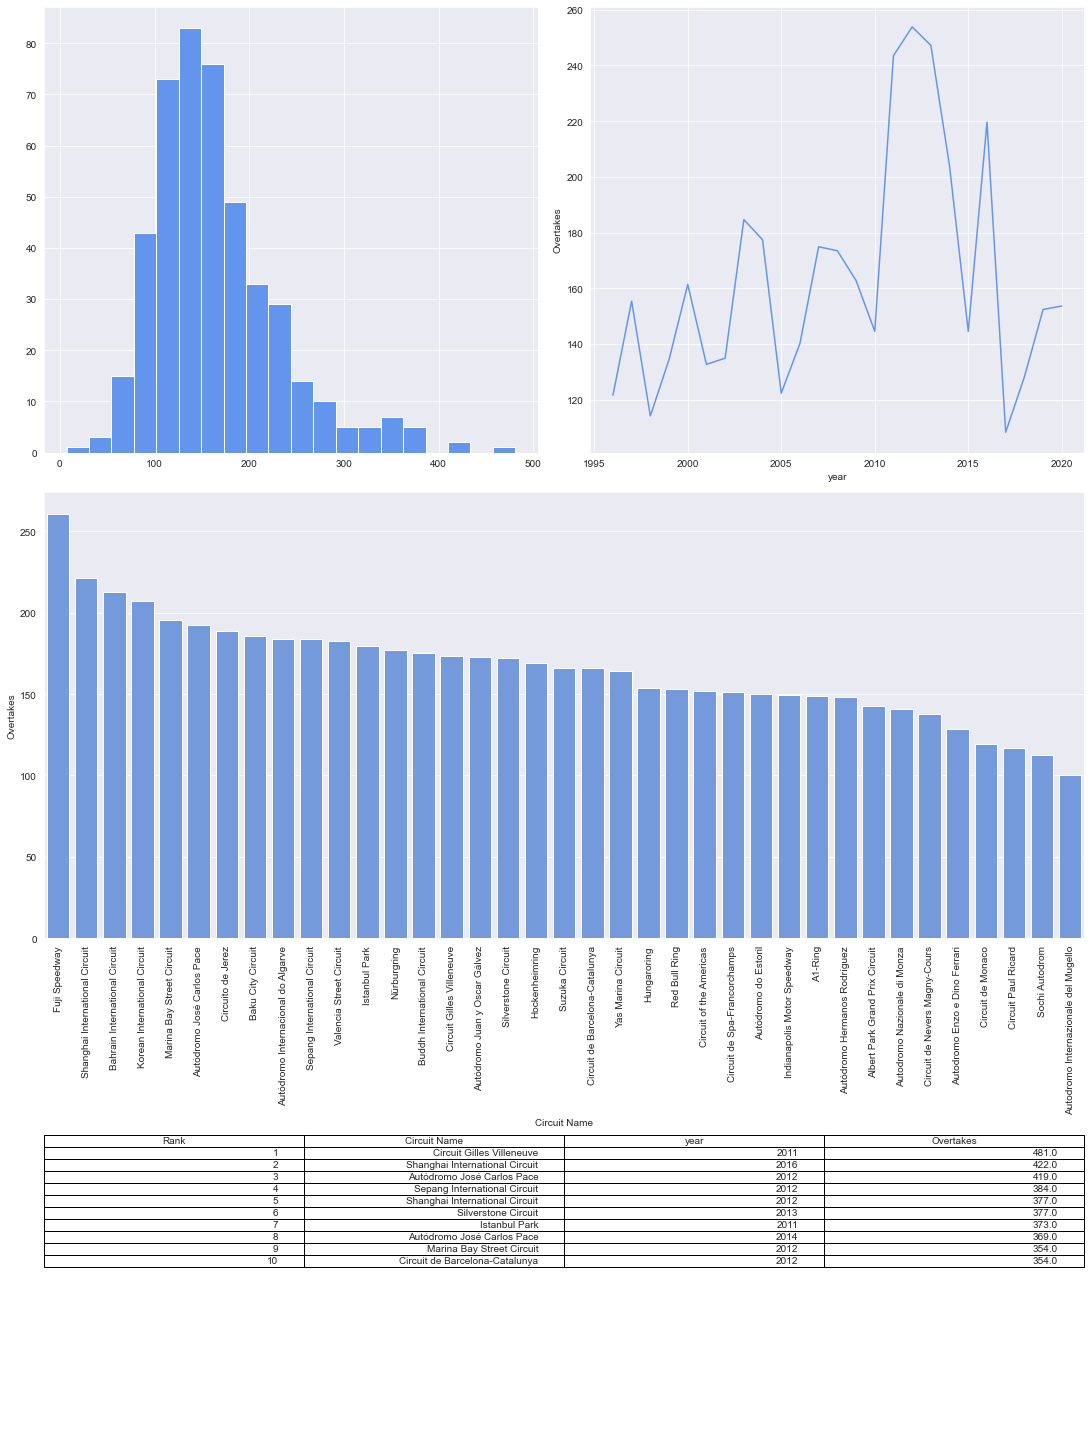

In [4]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(3,2)

ax = f.add_subplot(gs[0, 0])
# histogram
fig1 = df_races.Overtakes[df_races.Overtakes>0].hist(bins=20,color='cornflowerblue')

ax = f.add_subplot(gs[0, 1])
# plot average overtakes per season over years
df_overtakes_year = df_races[df_races.Overtakes>0][['year', 'Overtakes']].groupby(['year']).mean().reset_index()
fig2 = sns.lineplot(x=df_overtakes_year.year, y=df_overtakes_year.Overtakes,color='cornflowerblue')


plt.tight_layout()

sns.set_style('white')
ax = f.add_subplot(gs[2, 0:])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
# list the top ten races
df_overtakes_top_ten = df_races[['Circuit Name', 'year', 'Overtakes']].sort_values(by='Overtakes', ascending=False)[:10]
df_overtakes_top_ten['Rank'] = list(range(1,11))
df_overtakes_top_ten = df_overtakes_top_ten[['Rank','Circuit Name', 'year', 'Overtakes']]
plt.table(cellText=df_overtakes_top_ten.values, colLabels=df_overtakes_top_ten.columns, loc='center')
sns.set_style('darkgrid')

ax = f.add_subplot(gs[1, 0:])
# plot average overtakes for each race tracks top 20
df_overtakes_track = df_races[df_races.Overtakes>0][['Circuit Name', 'Overtakes']].groupby(['Circuit Name']).mean().reset_index().sort_values(by=['Overtakes'], ascending=False)
fig3 = sns.barplot(x=df_overtakes_track['Circuit Name'], y=df_overtakes_track['Overtakes'], color='cornflowerblue')
fig3 = fig3.set_xticklabels(labels=fig3.get_xticklabels(), rotation=90)



We can see, that there is are on average about 100 overtakes per race. On has to mention here that this result includes a large portion of overtakes, that took place while one car has been in the pitlane. But as this applies to every race, the numbers above are still giving a good estimate on which race had the most overtakes. Regarding the development overtime, we can see that there is a high volatility, with a slight upwards trend from 1996 till 2013 (250 Overtakes in 2012). After 2013 the amount of overtakes dropped below 120 in 2017. Summing up we can say that most overtakes took place in 2015 Season, and most overtakes took place on circuit Gilles Villeneuve in 2011.

### Was there racing for the top positions till the end of the race
Eventhough fighting for positions is always nice to watch, it might become boring, if it is only drivers fighting for becoming 12th. Therefore it is essential for an exciting race, that drivers are battling for top places till the end of the race. Therefore I will take a closer look into the average time difference between the top 5 drivers and especially between the top 2 drivers next.

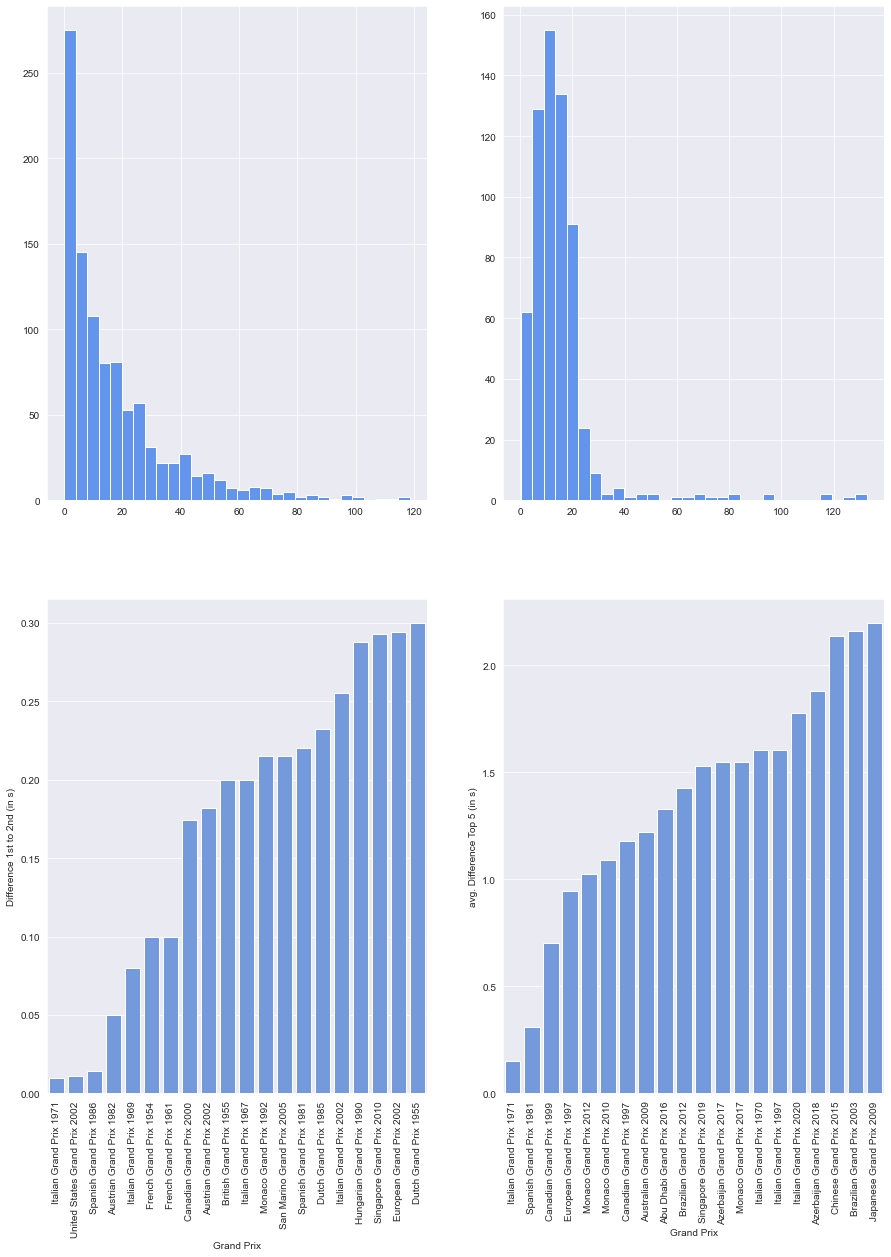

In [5]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(2,2)

df_time_diff = df_races[['year', 'name', 'Difference 1st to 2nd (in s)', 'avg. Difference Top 5 (in s)']]
#histogram  time difference top 2
ax = f.add_subplot(gs[0, 0])
fig1 = df_time_diff[(df_time_diff['Difference 1st to 2nd (in s)']>0) & (df_time_diff['Difference 1st to 2nd (in s)']<120)]['Difference 1st to 2nd (in s)'].hist(bins=30,color='cornflowerblue')

#histogram  time difference top 5
ax = f.add_subplot(gs[0, 1])
fig2 = df_time_diff[df_time_diff['avg. Difference Top 5 (in s)']>0]['avg. Difference Top 5 (in s)'].hist(bins=30,color='cornflowerblue')

# Top Races by difference of 1st and 2nd
df_top_20 = df_time_diff[df_time_diff['Difference 1st to 2nd (in s)']>0].sort_values(by='Difference 1st to 2nd (in s)')[:20]
df_top_20['Grand Prix'] = df_top_20['name'] + ' ' + df_top_20['year'].astype(str)
ax = f.add_subplot(gs[1, 0])
fig3 = sns.barplot(x=df_top_20['Grand Prix'], y=df_top_20['Difference 1st to 2nd (in s)'], color='cornflowerblue')
fig3 = fig3.set_xticklabels(labels=fig3.get_xticklabels(), rotation=90)

# Top Races by avg. difference of top 5
df_top_20 = df_time_diff[df_time_diff['avg. Difference Top 5 (in s)']>0].sort_values(by='avg. Difference Top 5 (in s)')[:20]
df_top_20['Grand Prix'] = df_top_20['name'] + ' ' + df_top_20['year'].astype(str)
ax = f.add_subplot(gs[1, 1])
fig3 = sns.barplot(x=df_top_20['Grand Prix'], y=df_top_20['avg. Difference Top 5 (in s)'], color='cornflowerblue')
fig3 = fig3.set_xticklabels(labels=fig3.get_xticklabels(), rotation=90)

From the plots above we can see that for both categories, the plots are heavily right skewed, which is a good thing for every racing fan, as it means we tend to have more races which are close at the top till the end. However we also have some races which were pretty boring at the end as the leader where far ahed and also in the top ten drivers where out of reach to overtake each other.

### What was the Top Speed
Another aspect every car enthusiast is in to, is speed. Fans not only want to see the cars racing eachother, they also want the race cars to be fast. Therefore we are looking into how the top speed developed overtime in general and for each race track.

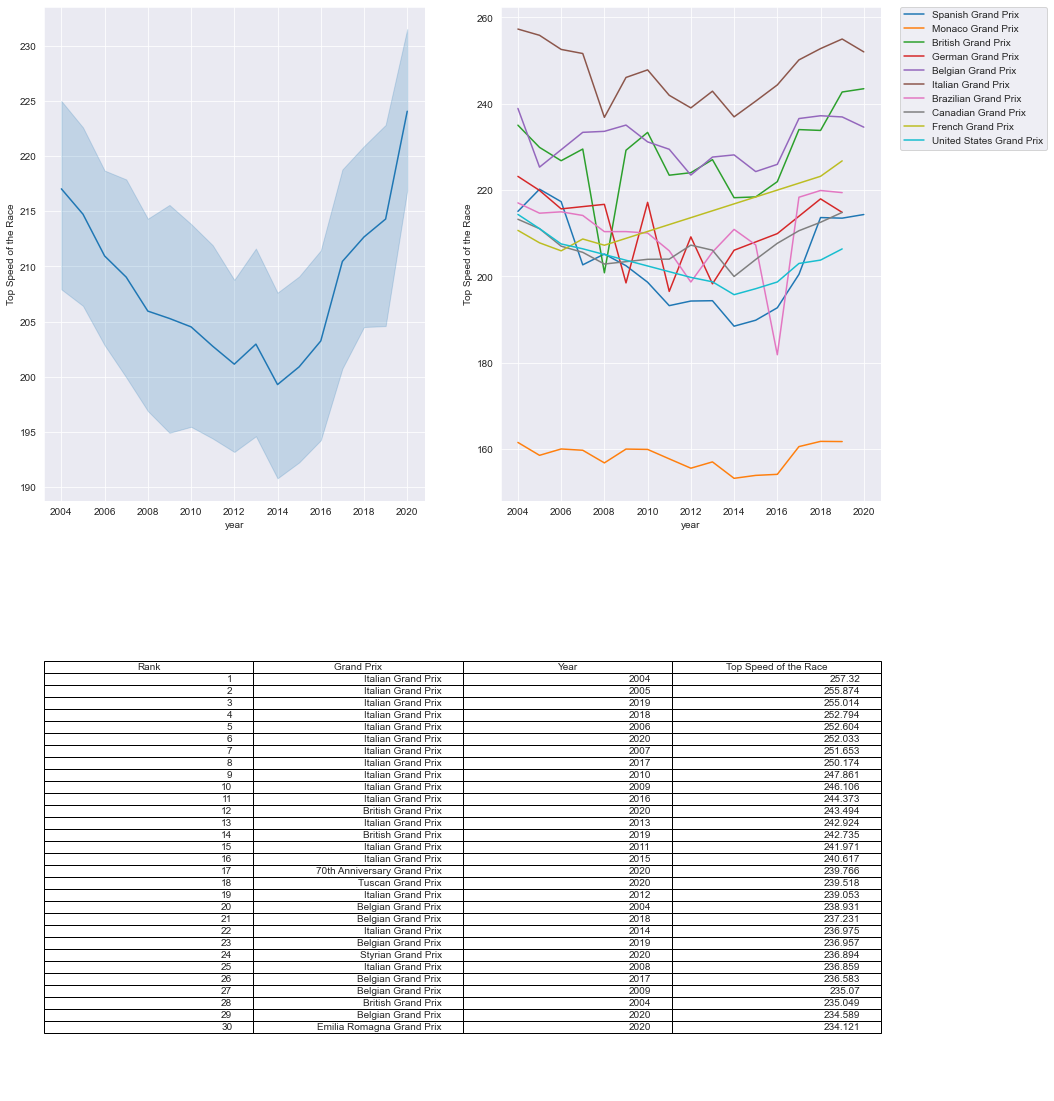

In [43]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(2,2)

ax = f.add_subplot(gs[0, 0])
df_speed = df_races[['year', 'name', 'Top Speed of the Race']]
fig1 = sns.lineplot(x="year", y="Top Speed of the Race", data=df_speed)

ax = f.add_subplot(gs[0,1])
top_ten = df_speed.groupby(['name']).count().sort_values(by='year', ascending=False).reset_index()['name'].to_list()[:10]
fig1 = sns.lineplot(x="year", y="Top Speed of the Race", hue='name', data=df_speed[df_speed['name'].isin(top_ten)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.set_style('white')
ax = f.add_subplot(gs[1, 0:])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
# list the top ten highspeeds
df_speed_top_ten = df_speed.sort_values(by='Top Speed of the Race', ascending=False)[:30]
df_speed_top_ten['Rank'] = list(range(1,31))
df_speed_top_ten = df_speed_top_ten[['Rank','name', 'year', 'Top Speed of the Race']].rename(columns={'name':'Grand Prix', 'year':'Year'})
plt.table(cellText=df_speed_top_ten.values, colLabels=df_speed_top_ten.columns, loc='center')
sns.set_style('darkgrid')

We can see that the Italian Grand Prix is the fastest track in the calendar. It is also interesting to see that the most frequent tracks are showing the trend with the lower speeds around 2012, however the drop is not as deep as for the average of all tracks. It is also note worthy that eventhough one might think that the more modern cars are faster than older ones this does not hold true. This is due to two main reasons, the rule changes over the years as well as changing track layouts (also applicable to the Italian grand prix). These changes are made, in order to make the races as secure as possible.

### Was the race faster than previous races on this track
Besides the top speed, also the corner speed as well as the acceleration and deceleration of the cars are attracting the fans attention. As these are hard to quantify based on the available data, I am using the overall laptime, which is the best approximator for the mentioned criteria, that is available. We are going to look here again into the development over time and besides to this we will evealuate the races based on how close the best time got to the track record (record at the time the race took place).

/var/folders/86/jj_j7bm56glckk9r2cy1875h0000gn/T/ipykernel_38786/1073279260.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lap_times['Lap Time relative to Track Record'] = df_lap_times['Fastest Lap of the Race'] / df_lap_times['Lap record to Date']


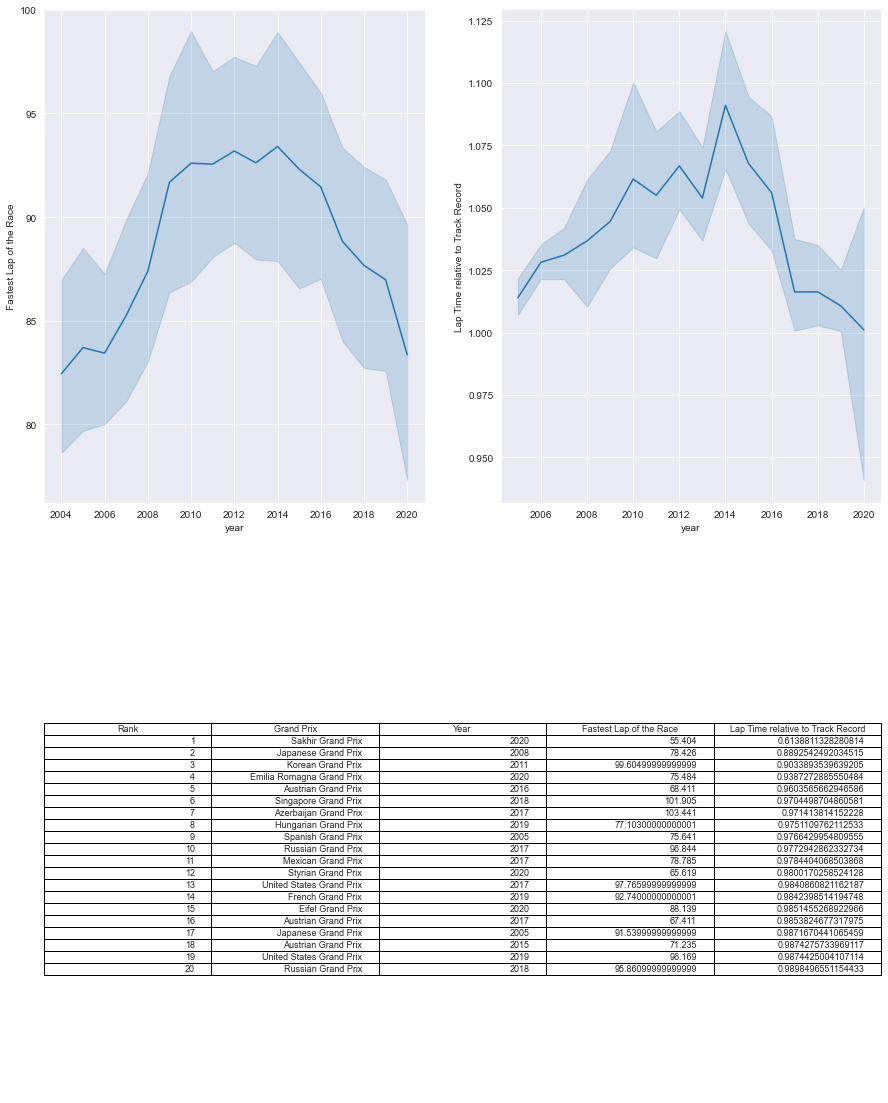

In [50]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(2,2)

ax = f.add_subplot(gs[0, 0])
df_lap_times = df_races[['year', 'name', 'Fastest Lap of the Race', 'Lap record to Date']]
fig1 = sns.lineplot(x="year", y="Fastest Lap of the Race", data=df_lap_times)

ax = f.add_subplot(gs[0, 1])
df_lap_times['Lap Time relative to Track Record'] = df_lap_times['Fastest Lap of the Race'] / df_lap_times['Lap record to Date']
fig1 = sns.lineplot(x="year", y="Lap Time relative to Track Record", data=df_lap_times)

sns.set_style('white')
ax = f.add_subplot(gs[1, 0:])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
# list the top ten highspeeds
df_time_top_ten = df_lap_times.sort_values(by='Lap Time relative to Track Record', ascending=True)[:20]
df_time_top_ten['Rank'] = list(range(1,21))
df_time_top_ten = df_time_top_ten[['Rank','name', 'year','Fastest Lap of the Race' ,'Lap Time relative to Track Record']].rename(columns={'name':'Grand Prix', 'year':'Year'})
plt.table(cellText=df_time_top_ten.values, colLabels=df_time_top_ten.columns, loc='center')
sns.set_style('darkgrid')

### How much time did the car spend in the pitstop area
Another aspect that catches the attention of the fans are the pitstops, especially the fact that the pit stop crews are able to switch the tires in less than 2 seconds. However besides this, fans want to see the cars racing and not driving slowly through the pit stop area. Therefore we are considering races as exciting for fans if cars spend few time in the pit stop area.

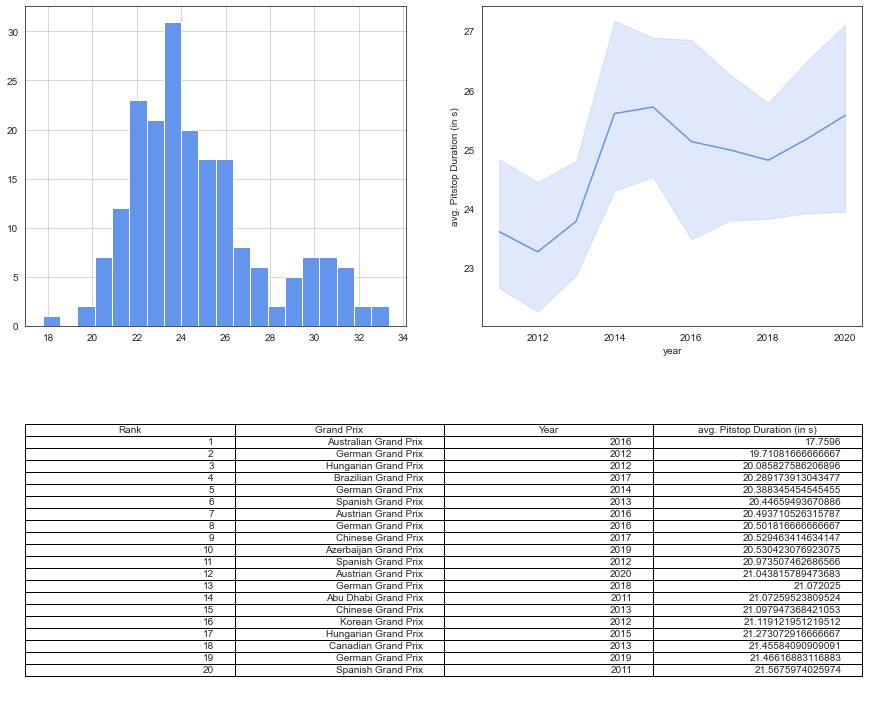

In [58]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(2,2)

ax = f.add_subplot(gs[0, 0])
# histogram
fig1 = df_races[df_races['avg. Pitstop Duration (in s)']>0]['avg. Pitstop Duration (in s)'].hist(bins=20,color='cornflowerblue')

ax = f.add_subplot(gs[0, 1])
df_pitstoptimes = df_races[df_races['avg. Pitstop Duration (in s)']>0][['year', 'name', 'avg. Pitstop Duration (in s)']]
fig2 = sns.lineplot(x=df_pitstoptimes.year, y=df_pitstoptimes['avg. Pitstop Duration (in s)'],color='cornflowerblue')

sns.set_style('white')
ax = f.add_subplot(gs[1, 0:])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
# list the top ten highspeeds
df_pit_time_top = df_pitstoptimes.sort_values(by='avg. Pitstop Duration (in s)', ascending=True)[:20]
df_pit_time_top['Rank'] = list(range(1,21))
df_pit_time_top = df_pit_time_top[['Rank','name', 'year','avg. Pitstop Duration (in s)']].rename(columns={'name':'Grand Prix', 'year':'Year'})
plt.table(cellText=df_pit_time_top.values, colLabels=df_pit_time_top.columns, loc='center')
sns.set_style('darkgrid')

### Does the race track have a long tradition
Besides all the performance related factors, Formula 1 racing is a sport with a long history and many traditions. For example the Grand Prix de Monaco is one of the highlights in the Formula 1 Calendar every year, eventhough the races are pretty slow due to the track layout. For the same reason there are only very few opportunities to overtake. In order to include this factor into the analysis we are considering the number of races that already took place at this track before the race.

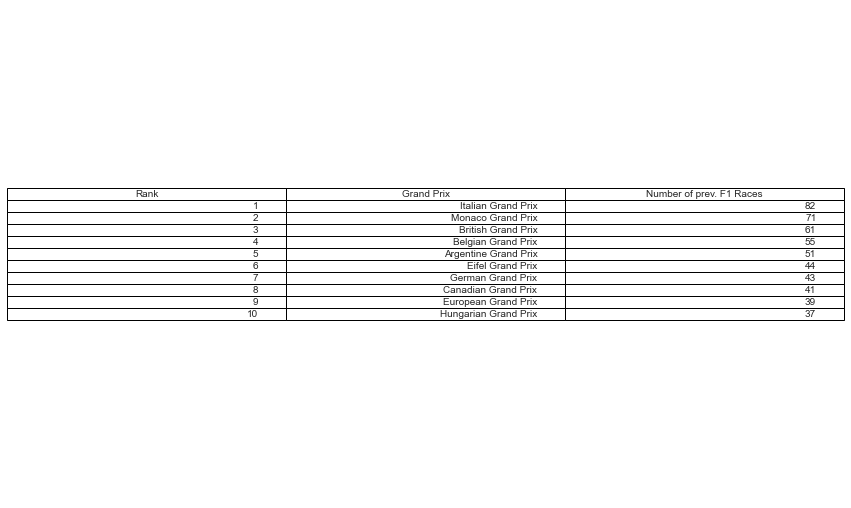

In [70]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(2,1)


sns.set_style('white')
ax = f.add_subplot(gs[0, 0])
df_tradition = df_races[['name', 'Number of prev. F1 Races']]
top_ten = df_tradition.groupby(['name']).max().sort_values(by='Number of prev. F1 Races', ascending=False).reset_index()[:11]
top_ten = top_ten.drop([3]) # Drop 70th aniversary grand prix as this is the same as the british grand prix (problem occured due to construction of this attribute based on circuitId)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
# list the top ten highspeeds
top_ten['Rank'] = list(range(1,11))
top_ten = top_ten[['Rank', 'name', 'Number of prev. F1 Races']].rename(columns={'name':'Grand Prix'})
plt.table(cellText=top_ten.values, colLabels=top_ten.columns, loc='center')
sns.set_style('darkgrid')

### Does the race have any importance for the Championship (Driver and Constructors)
The final factor we are considering, that adds tension to a race is its importance for the title race. If it is already clear which driver and which team will take home the championship the race is no longer that exciting compared to one where drivers and teams have to fight for every point in the championship. Here we will consider the difference between the leader and the second place in the championships as well as the factor how many races have already been raced, because the later we are in the season the higher the tension.

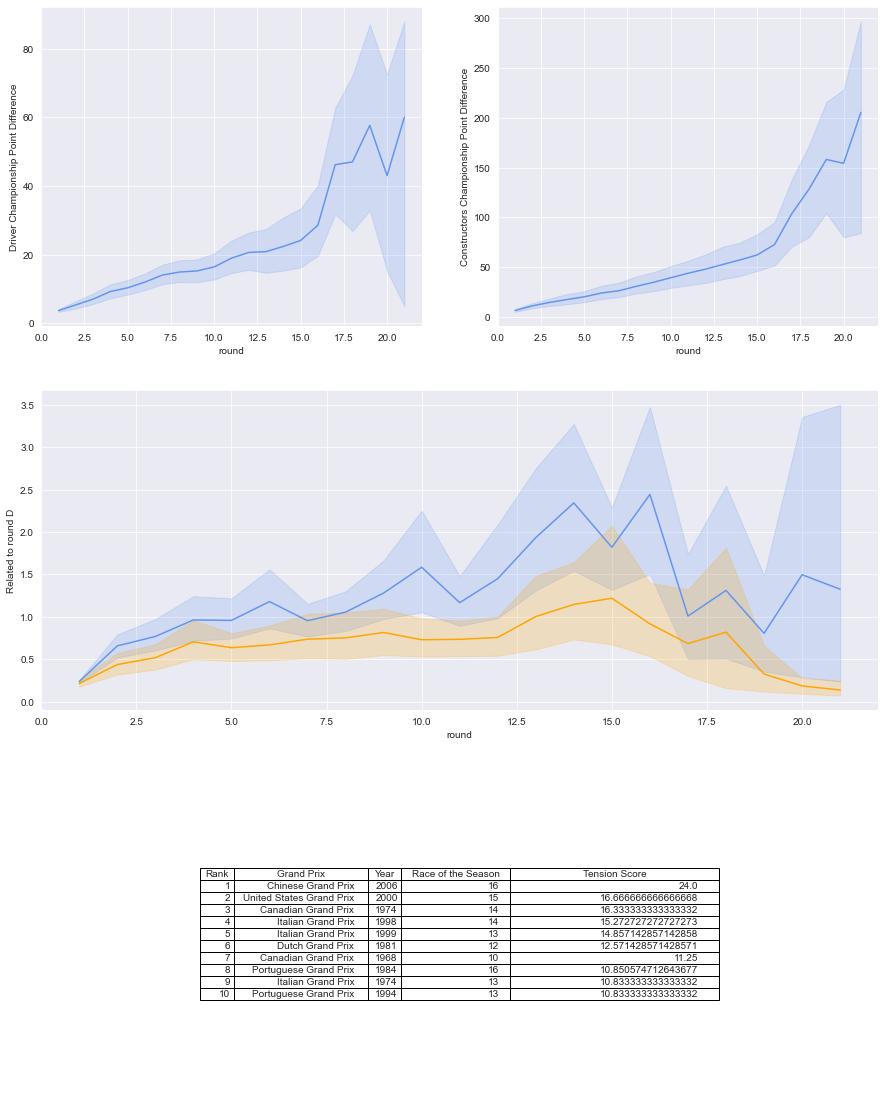

In [132]:
f = plt.figure(figsize=(15, 20))
gs = f.add_gridspec(3,2)

# Point difference over round drivers
ax = f.add_subplot(gs[0, 0])
fig1 = sns.lineplot(x=df_races['round'], y=df_races['Driver Championship Point Difference'],color='cornflowerblue')

# Point difference over round constructors
ax = f.add_subplot(gs[0, 1])
fig2 = sns.lineplot(x=df_races['round'], y=df_races['Constructors Championship Point Difference'],color='cornflowerblue')

# Build score for drivers and championship
ax = f.add_subplot(gs[1, 0:])
df_races['Related to round D'] = df_races['round'] / (1+ df_races['Driver Championship Point Difference'])
fig3 = sns.lineplot(x=df_races['round'], y=df_races['Related to round D'],color='cornflowerblue')

# Build score for constructors and championship
df_races['Related to round C'] = df_races['round'] / (1 + df_races['Constructors Championship Point Difference'])
fig3 = sns.lineplot(x=df_races['round'], y=df_races['Related to round C'],color='orange')

# Table with closest races and their attributes
df_races['Tension Score'] = df_races['Related to round C'] + df_races['Related to round D']

sns.set_style('white')
ax = f.add_subplot(gs[2, 0:])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
df_top_tension = df_races.sort_values(by='Tension Score', ascending=False)[:10]
df_top_tension['Rank'] = list(range(1,11))
df_top_tension = df_top_tension[['Rank','name', 'year', 'round','Tension Score']].rename(columns={'round':'Race of the Season', 'name':'Grand Prix', 'year':'Year'})
plt.table(cellText=df_top_tension.values, colLabels=df_top_tension.columns, loc='center', colWidths=[0.04,0.16,0.04,0.13,0.25,0.25,0.15]).auto_set_font_size(False)
sns.set_style('darkgrid')

We can see from the first plots, that the distants between first and second increases over the season, which makes absolutely sense as the leader is likely to expand its lead. What is interesting is that on average the constructor championship seems to be decided earlier than the driver championship. This can be explained by the fact that every team has two drivers, so there are several season where two drivers from the same team are fighting for the championship. It is interesting that the closer this race is, the clearer is the constructors championship, because these two drivers collect the majority of points for the same team. 

### Coming up with a Ranking, which races are the most exciting to watch

In [155]:
def normalize_tradition(year, tradition, df):
    max_this_year = df[df['year']==year]['Number of prev. F1 Races'].max()
    min_this_year = df[df['year']==year]['Number of prev. F1 Races'].min()
    return ((tradition-min_this_year) / (max_this_year-min_this_year))

In [158]:
df_races['Overtakes (normalized)'] = (df_races['Overtakes']- df_races['Overtakes'].min()) / (df_races['Overtakes'].max() - df_races['Overtakes'].min())
df_races['Distance Top 2 (normalized)'] = (df_races['Difference 1st to 2nd (in s)'].max() - df_races['Difference 1st to 2nd (in s)']) / (df_races['Difference 1st to 2nd (in s)'].max() - df_races[df_races['Difference 1st to 2nd (in s)']>0]['Difference 1st to 2nd (in s)'].min())
df_races[df_races['Distance Top 2 (normalized)']>1]['Distance Top 2 (normalized)'] = 0
df_races['Distance Top 5 (normalized)'] = (df_races['avg. Difference Top 5 (in s)'].max() - df_races['avg. Difference Top 5 (in s)']) / (df_races['avg. Difference Top 5 (in s)'].max() - df_races[df_races['avg. Difference Top 5 (in s)']>0]['avg. Difference Top 5 (in s)'].min())
df_races[df_races['Distance Top 5 (normalized)']>1]['Distance Top 5 (normalized)'] = 0
df_races['Top Speed (normalized)'] = (df_races['Top Speed of the Race']- df_races['Top Speed of the Race'].min()) / (df_races['Top Speed of the Race'].max() - df_races['Top Speed of the Race'].min())
df_races['Relative Laptime (normalized)'] = df_races['Lap record to Date'] / df_races['Fastest Lap of the Race']
df_races['Relative Laptime (normalized)'] = (df_races['Relative Laptime (normalized)']- df_races['Relative Laptime (normalized)'].min()) / (df_races['Relative Laptime (normalized)'].max() - df_races['Relative Laptime (normalized)'].min())
df_races['Pitstop Time (normalized)'] = (df_races['avg. Pitstop Duration (in s)'].max()-df_races['avg. Pitstop Duration (in s)']) / (df_races['avg. Pitstop Duration (in s)'].max()-df_races['avg. Pitstop Duration (in s)'].min())
df_races = df_races.assign(Tradition_normalized = lambda x: normalize_tradition(x.year, x['Number of prev. F1 Races'], df_races))
df_races['Championship Importance'] = (df_races['Tension Score']- df_races['Tension Score'].min()) / (df_races['Tension Score'].max() - df_races['Tension Score'].min())

df_races['Overall Score'] = (df_races['Overtakes (normalized)'] + df_races['Distance Top 2 (normalized)'] + df_races['Distance Top 5 (normalized)'] + df_races['Top Speed (normalized)'] + df_races['Relative Laptime (normalized)'] + df_races['Pitstop Time (normalized)'] + df_races['Tradition_normalized']/4 + df_races['Championship Importance']) /  8
df_races = df_races.sort_values(by='Overall Score', ascending=False)
df_races.head(10)

/var/folders/86/jj_j7bm56glckk9r2cy1875h0000gn/T/ipykernel_38786/1066554011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_races[df_races['Distance Top 2 (normalized)']>1]['Distance Top 2 (normalized)'] = 0
/var/folders/86/jj_j7bm56glckk9r2cy1875h0000gn/T/ipykernel_38786/1066554011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_races[df_races['Distance Top 5 (normalized)']>1]['Distance Top 5 (normalized)'] = 0


,raceId,year,round,circuitId,name,date,url,Circuit Name,City,1st Driver Name,...,Tension Score,Overtakes (normalized),Distance Top 2 (normalized),Distance Top 5 (normalized),Top Speed (normalized),Relative Laptime (normalized),Pitstop Time (normalized),Tradition_normalized,Championship Importance,Overall Score
1304,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...,Bahrain International Circuit,Sakhir,Sergio Pérez,...,0.186776,0.365904,0.966400,0.975995,0.739636,1.000000,0.457817,0.195122,0.002101,0.569579
1214,956,2016,9,70,Austrian Grand Prix,2016-07-03,https://en.wikipedia.org/wiki/2016_Austrian_Gr...,Red Bull Ring,Spielburg,Lewis Hamilton,...,0.836538,0.706861,0.981745,0.942684,0.714979,0.321353,0.824603,0.024390,0.029330,0.565957
1139,872,2012,13,14,Italian Grand Prix,2012-09-09,http://en.wikipedia.org/wiki/2012_Italian_Gran...,Autodromo Nazionale di Monza,Monza,Lewis Hamilton,...,0.775439,0.567568,0.986103,0.942873,0.824538,0.191711,0.688323,0.902439,0.026769,0.556687
1146,879,2012,20,18,Brazilian Grand Prix,2012-11-25,http://en.wikipedia.org/wiki/2012_Brazilian_Gr...,Autódromo José Carlos Pace,São Paulo,Jenson Button,...,5.327869,0.871102,0.991226,0.990379,0.436940,0.176121,0.613801,0.353659,0.217540,0.548191
1278,1020,2019,11,10,German Grand Prix,2019-07-28,https://en.wikipedia.org/wiki/2019_German_Gran...,Hockenheimring,Hockenheim,Max Verstappen,...,0.335730,0.675676,0.976584,0.983066,0.591953,0.230521,0.762219,0.463415,0.008343,0.543027
1296,1038,2020,8,14,Italian Grand Prix,2020-09-06,https://en.wikipedia.org/wiki/2020_Italian_Gra...,Autodromo Nazionale di Monza,Monza,Pierre Gasly,...,0.231183,0.347193,0.998705,0.987737,0.949216,0.249961,0.532563,1.000000,0.003962,0.539917
1112,847,2011,7,7,Canadian Grand Prix,2011-06-12,http://en.wikipedia.org/wiki/2011_Canadian_Gra...,Circuit Gilles Villeneuve,Montreal,Jenson Button,...,0.214754,1.000000,0.991370,0.962662,0.487907,0.223658,0.518369,0.402439,0.003274,0.535981
1219,961,2016,14,14,Italian Grand Prix,2016-09-04,https://en.wikipedia.org/wiki/2016_Italian_Gra...,Autodromo Nazionale di Monza,Monza,Nico Rosberg,...,4.733652,0.380457,0.951845,0.915671,0.875639,0.215583,0.509924,0.951220,0.192639,0.534945
1257,999,2018,11,10,German Grand Prix,2018-07-22,https://en.wikipedia.org/wiki/2018_German_Gran...,Hockenheimring,Hockenheim,Lewis Hamilton,...,1.833333,0.438669,0.985531,0.950935,0.622008,0.246706,0.787504,0.451220,0.071100,0.526907
1129,864,2012,5,4,Spanish Grand Prix,2012-05-13,http://en.wikipedia.org/wiki/2012_Spanish_Gran...,Circuit de Barcelona-Catalunya,Montmeló,Pastor Maldonado,...,5.416667,0.735967,0.989816,0.879162,0.394619,0.131648,0.793824,0.268293,0.221261,0.526671
